In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

import matplotlib
matplotlib.rcParams['text.usetex'] = True

image_path = ".//images//"

# Reference Quadrature Element

In [2]:
local_coords = sp.Matrix([
    [-1, -1],
    [1, -1],
    [1, 1],
    [-1, 1]
])
n_nodes = local_coords.shape[0]

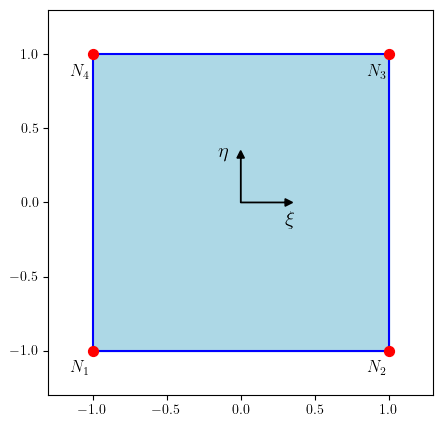

In [3]:
ref_quad_fig = plt.figure(figsize=(8, 5), facecolor="white")
ref_quad_axes = ref_quad_fig.add_subplot(1, 1, 1)

ref_quad_axes.set_aspect("equal")
ref_quad_axes.set_xlim(-1.3, 1.3)
ref_quad_axes.set_ylim(-1.3, 1.3)

for i_node in range(n_nodes):
    ref_quad_axes.scatter(
        local_coords[i_node, 0],
        local_coords[i_node, 1],
        color="red",
        s=50,
        zorder=10
    )
    ref_quad_axes.text(
        local_coords[i_node, 0] - 0.15,
        local_coords[i_node, 1] - 0.15,
        "$N_{}$".format(i_node + 1),
        fontsize=12
    )
    i_node_next = (i_node + 1) % n_nodes
    ref_quad_axes.plot(
        [local_coords[i_node, 0], local_coords[i_node_next, 0]],
        [local_coords[i_node, 1], local_coords[i_node_next, 1]],
        color="blue"
    )
    pass

ref_quad_axes.fill(
    local_coords[:, 0],
    local_coords[:, 1],
    color="lightblue",
    zorder=0
)

ref_quad_axes.arrow(
    0, 0, 0.3, 0,
    head_width=0.05,
    head_length=0.05,
    fc='k',
    ec='k'
)
ref_quad_axes.text(
    0.3, -0.15, r"$\xi$",
    fontsize=15
)
ref_quad_axes.arrow(
    0, 0, 0, 0.3,
    head_width=0.05,
    head_length=0.05,
    fc='k',
    ec='k'
)
ref_quad_axes.text(
    -0.15, 0.3, r"$\eta$",
    fontsize=15
)

ref_quad_fig.savefig(os.path.join(image_path, "ref_quad_elem.png"), bbox_inches="tight")

ref_quad_fig.show()

# Transformation

$$
\begin{bmatrix}
x\\ y
\end{bmatrix}=
\begin{bmatrix}
A_0 + A_1\xi + A_2\eta + A_3\xi\eta\\
B_0 + B_1\xi + B_2\eta + B_3\xi\eta
\end{bmatrix}
$$

Thus:

$$
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{bmatrix}=
\begin{bmatrix}
1 & \xi_1 & \eta_1 & \xi_1\eta_1\\
1 & \xi_2 & \eta_2 & \xi_2\eta_2\\
1 & \xi_3 & \eta_3 & \xi_3\eta_3\\
1 & \xi_4 & \eta_4 & \xi_4\eta_4
\end{bmatrix}
\begin{bmatrix}
A_0 \\ A_1 \\ A_2 \\ A_3
\end{bmatrix}
$$

In [4]:
x_1, y_1 = sp.symbols("x_1, y_1")
x_2, y_2 = sp.symbols("x_2, y_2")
x_3, y_3 = sp.symbols("x_3, y_3")
x_4, y_4 = sp.symbols("x_4, y_4")
xi, eta = sp.symbols("xi, eta")

In [5]:
coeff_to_node = sp.zeros(n_nodes, n_nodes)
for i_node in range(n_nodes):
    coeff_to_node[i_node, :] = sp.Matrix([
        [1, \
        local_coords[i_node, 0], \
        local_coords[i_node, 1], \
        local_coords[i_node, 0] * local_coords[i_node, 1]]
    ])
    pass
coeff_to_node

Matrix([
[1, -1, -1,  1],
[1,  1, -1, -1],
[1,  1,  1,  1],
[1, -1,  1, -1]])

In [6]:
node_to_coeff = coeff_to_node.inv()
node_to_coeff

Matrix([
[ 1/4,  1/4, 1/4,  1/4],
[-1/4,  1/4, 1/4, -1/4],
[-1/4, -1/4, 1/4,  1/4],
[ 1/4, -1/4, 1/4, -1/4]])

In [7]:
A_0, A_1, A_2, A_3 = node_to_coeff @ sp.Matrix([x_1, x_2, x_3, x_4])
x = A_0 + A_1 * xi + A_2 * eta + A_3 * xi * eta
x = sp.simplify(x)
x

eta*xi*(x_1 - x_2 + x_3 - x_4)/4 - eta*(x_1 + x_2 - x_3 - x_4)/4 + x_1/4 + x_2/4 + x_3/4 + x_4/4 - xi*(x_1 - x_2 - x_3 + x_4)/4

In [8]:
B_0, B_1, B_2, B_3 = node_to_coeff @ sp.Matrix([y_1, y_2, y_3, y_4])
y = B_0 + B_1 * xi + B_2 * eta + B_3 * xi * eta
y = sp.simplify(y)
y

eta*xi*(y_1 - y_2 + y_3 - y_4)/4 - eta*(y_1 + y_2 - y_3 - y_4)/4 - xi*(y_1 - y_2 - y_3 + y_4)/4 + y_1/4 + y_2/4 + y_3/4 + y_4/4

In [9]:
jacobian_matrix = sp.Matrix([x, y]).jacobian(sp.Matrix([xi, eta]))
jacobian_matrix = sp.simplify(jacobian_matrix)
jacobian_matrix

Matrix([
[eta*(x_1 - x_2 + x_3 - x_4)/4 - x_1/4 + x_2/4 + x_3/4 - x_4/4, -x_1/4 - x_2/4 + x_3/4 + x_4/4 + xi*(x_1 - x_2 + x_3 - x_4)/4],
[eta*(y_1 - y_2 + y_3 - y_4)/4 - y_1/4 + y_2/4 + y_3/4 - y_4/4,  xi*(y_1 - y_2 + y_3 - y_4)/4 - y_1/4 - y_2/4 + y_3/4 + y_4/4]])

In [10]:
jacobian_det = jacobian_matrix.det()
jacobian_det = sp.simplify(jacobian_det)
jacobian_det

-eta*x_1*y_2/8 + eta*x_1*y_3/8 + eta*x_2*y_1/8 - eta*x_2*y_4/8 - eta*x_3*y_1/8 + eta*x_3*y_4/8 + eta*x_4*y_2/8 - eta*x_4*y_3/8 - x_1*xi*y_3/8 + x_1*xi*y_4/8 + x_1*y_2/8 - x_1*y_4/8 + x_2*xi*y_3/8 - x_2*xi*y_4/8 - x_2*y_1/8 + x_2*y_3/8 + x_3*xi*y_1/8 - x_3*xi*y_2/8 - x_3*y_2/8 + x_3*y_4/8 - x_4*xi*y_1/8 + x_4*xi*y_2/8 + x_4*y_1/8 - x_4*y_3/8

In [11]:
C_1 = jacobian_det.diff(xi)
C_1

-x_1*y_3/8 + x_1*y_4/8 + x_2*y_3/8 - x_2*y_4/8 + x_3*y_1/8 - x_3*y_2/8 - x_4*y_1/8 + x_4*y_2/8

In [12]:
C_2 = jacobian_det.diff(eta)
C_2

-x_1*y_2/8 + x_1*y_3/8 + x_2*y_1/8 - x_2*y_4/8 - x_3*y_1/8 + x_3*y_4/8 + x_4*y_2/8 - x_4*y_3/8

In [13]:
C_0 = jacobian_det - C_1 * xi - C_2 * eta
C_0 = sp.simplify(C_0)
C_0

x_1*y_2/8 - x_1*y_4/8 - x_2*y_1/8 + x_2*y_3/8 - x_3*y_2/8 + x_3*y_4/8 + x_4*y_1/8 - x_4*y_3/8

Jacobi matrix:

$$
J=
\begin{bmatrix}
\frac{\partial x}{\partial \xi} & \frac{\partial x}{\partial \eta}\\
\frac{\partial y}{\partial \xi} & \frac{\partial y}{\partial \eta}
\end{bmatrix}=
\begin{bmatrix}
\frac{\eta \left(x_{1} - x_{2} + x_{3} - x_{4}\right)}{4} - \frac{x_{1}}{4} + \frac{x_{2}}{4} + \frac{x_{3}}{4} - \frac{x_{4}}{4} & - \frac{x_{1}}{4} - \frac{x_{2}}{4} + \frac{x_{3}}{4} + \frac{x_{4}}{4} + \frac{\xi \left(x_{1} - x_{2} + x_{3} - x_{4}\right)}{4}\\\frac{\eta \left(y_{1} - y_{2} + y_{3} - y_{4}\right)}{4} - \frac{y_{1}}{4} + \frac{y_{2}}{4} + \frac{y_{3}}{4} - \frac{y_{4}}{4} & \frac{\xi \left(y_{1} - y_{2} + y_{3} - y_{4}\right)}{4} - \frac{y_{1}}{4} - \frac{y_{2}}{4} + \frac{y_{3}}{4} + \frac{y_{4}}{4}
\end{bmatrix}
$$

Determinant of Jacobi matrix has the form of:

$$
det(J) = C_0 + C_1 \xi + C_2 \eta
$$

where:

$$
\begin{aligned}
C_0 &= \frac{x_{1} y_{2}}{8} - \frac{x_{1} y_{4}}{8} - \frac{x_{2} y_{1}}{8} + \frac{x_{2} y_{3}}{8} - \frac{x_{3} y_{2}}{8} + \frac{x_{3} y_{4}}{8} + \frac{x_{4} y_{1}}{8} - \frac{x_{4} y_{3}}{8} \\
C_1 &= - \frac{x_{1} y_{3}}{8} + \frac{x_{1} y_{4}}{8} + \frac{x_{2} y_{3}}{8} - \frac{x_{2} y_{4}}{8} + \frac{x_{3} y_{1}}{8} - \frac{x_{3} y_{2}}{8} - \frac{x_{4} y_{1}}{8} + \frac{x_{4} y_{2}}{8} \\
C_2 &= - \frac{x_{1} y_{2}}{8} + \frac{x_{1} y_{3}}{8} + \frac{x_{2} y_{1}}{8} - \frac{x_{2} y_{4}}{8} - \frac{x_{3} y_{1}}{8} + \frac{x_{3} y_{4}}{8} + \frac{x_{4} y_{2}}{8} - \frac{x_{4} y_{3}}{8}
\end{aligned}
$$

In [14]:
# print(sp.latex(jacobian_matrix))
# print(sp.latex(jacobian_det))
# print(sp.latex(C_0))
# print(sp.latex(C_1))
# print(sp.latex(C_2))